<a href="https://colab.research.google.com/github/DevOrtega/NaiveBayes/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media de cada característica: [1.02820224 0.0167077 ]
AUC: 1.0


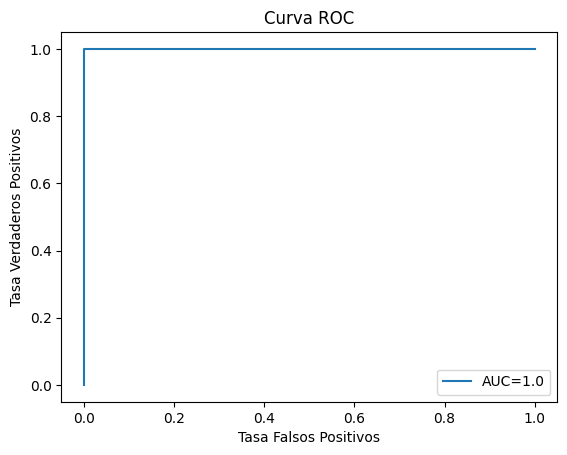

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Crear conjunto de datos sintético
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Uso explícito de numpy: calcular la media de cada característica
mean_features = np.mean(X, axis=0)
print("Media de cada característica:", mean_features)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Entrenar el clasificador Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predecir probabilidades para la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="AUC="+str(round(auc, 3)))
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Instalar R y el kernel R
!apt-get update -qq
!apt-get install -y r-base r-base-dev
!pip install rpy2

# Instalar el kernel R para Jupyter
!R -e "install.packages('IRkernel', repos='https://cloud.r-project.org')"
!R -e "IRkernel::installspec()"


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base-dev is already the newest version (4.5.2-1.2204.0).
r-base is already the newest version (4.5.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.

R version 4.5.2 (2025-10-31) -- "[Not] Part in a Rumble"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in

In [ ]:
install.packages("e1071", repos = "https://cloud.r-project.org")
install.packages("pROC", repos = "https://cloud.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




[1] "Media de cada característica: -0.0344, -0.0836"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.9867"


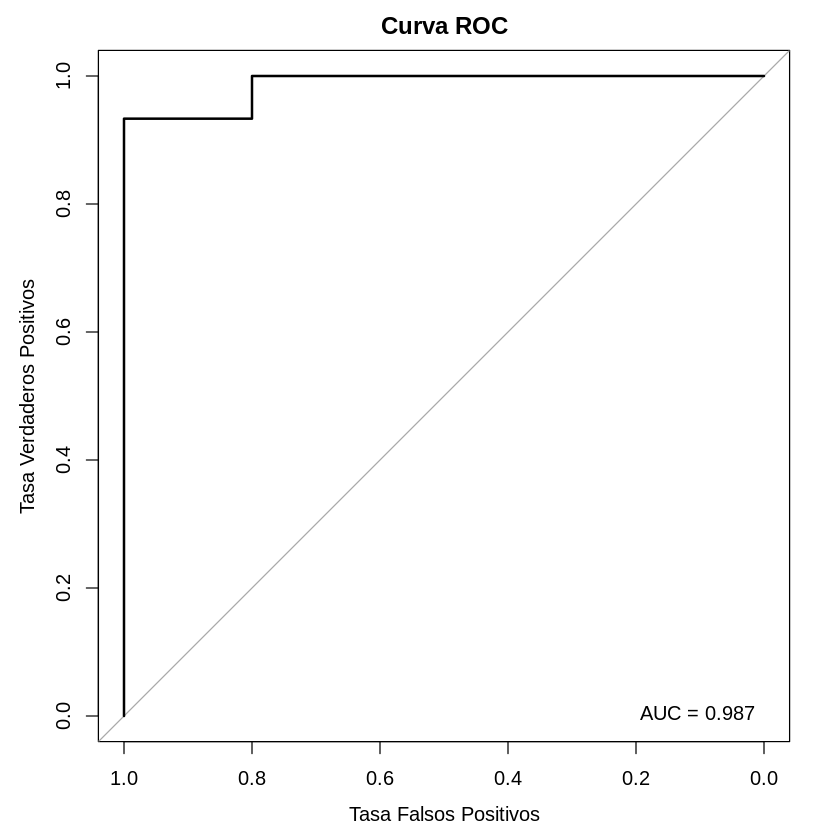

In [ ]:
library(e1071)   # naiveBayes
library(pROC)    # roc, auc

set.seed(42)
n_samples <- 100
n_features <- 2

# Crear datos sintéticos: dos clases con medias distintas
mu0 <- c(-1, -1)
mu1 <- c(1, 1)
Sigma <- diag(n_features) * 0.8

X0 <- MASS::mvrnorm(n = n_samples/2, mu = mu0, Sigma = Sigma)
X1 <- MASS::mvrnorm(n = n_samples/2, mu = mu1, Sigma = Sigma)
X <- rbind(X0, X1)
y <- factor(c(rep(0, n_samples/2), rep(1, n_samples/2)), levels = c(0, 1))

# Media de cada característica (uso explícito de R)
mean_features <- colMeans(X)
print(paste("Media de cada característica:", paste(round(mean_features, 4), collapse = ", ")))

# División entrenamiento/prueba (70/30) con semilla fija
set.seed(123)
idx <- sample(seq_len(n_samples))
train_idx <- idx[1:round(0.7 * n_samples)]
test_idx  <- idx[(round(0.7 * n_samples) + 1):n_samples]

X_train <- X[train_idx, , drop = FALSE]
X_test  <- X[test_idx, , drop = FALSE]
y_train <- y[train_idx]
y_test  <- y[test_idx]

# Entrenar Naive Bayes (gaussiano para variables numéricas)
model <- naiveBayes(x = X_train, y = y_train)

# Predecir probabilidades para la clase "1"
probs <- predict(model, X_test, type = "raw")[, "1"]

# Calcular AUC
roc_obj <- roc(response = y_test, predictor = probs)
auc_val <- auc(roc_obj)
print(paste("AUC:", round(as.numeric(auc_val), 4)))

# Graficar curva ROC
plot(roc_obj, main = "Curva ROC", xlab = "Tasa Falsos Positivos", ylab = "Tasa Verdaderos Positivos")
legend("bottomright", legend = paste("AUC =", round(as.numeric(auc_val), 3)), bty = "n")